<a href="https://colab.research.google.com/github/dzakiAdip/216_prakDATMIN/blob/main/Pertemuan4_AHC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **IMPORT LIBRARY**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score
import time # menjalankan waktu

In [5]:
df = pd.read_excel("Data UMKM.xlsx")
df

,Status Kepemilikan Tanah,Tujuan Pemasaran,Omset (Juta),Tenaga Kerja,Kepemilikan Asuransi Kesehatan
0,Lainnya,Dalam wilayah DIY,10,0,Tidak Ada
1,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,2,BPJS
2,Lainnya,Dalam wilayah Kota Yogyakarta,25,1,Tidak Ada
3,Sewa,Dalam wilayah Kota Yogyakarta,25,0,BPJS
4,Lainnya,Dalam wilayah Kota Yogyakarta,10,0,BPJS
5,Lainnya,Dalam wilayah DIY,10,3,Tidak Ada
6,Milik sendiri,Dalam wilayah DIY,10,0,Tidak Ada
7,Milik sendiri,Dalam wilayah DIY,10,0,BPJS
8,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,0,Tidak Ada
9,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,0,Tidak Ada


In [6]:
df.columns = ['status_kepemilikan_tanah','tujuan_pemasaran','omset','tenaga_kerja','kepemilikan_asuransi_kesehatan']
df

,status_kepemilikan_tanah,tujuan_pemasaran,omset,tenaga_kerja,kepemilikan_asuransi_kesehatan
0,Lainnya,Dalam wilayah DIY,10,0,Tidak Ada
1,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,2,BPJS
2,Lainnya,Dalam wilayah Kota Yogyakarta,25,1,Tidak Ada
3,Sewa,Dalam wilayah Kota Yogyakarta,25,0,BPJS
4,Lainnya,Dalam wilayah Kota Yogyakarta,10,0,BPJS
5,Lainnya,Dalam wilayah DIY,10,3,Tidak Ada
6,Milik sendiri,Dalam wilayah DIY,10,0,Tidak Ada
7,Milik sendiri,Dalam wilayah DIY,10,0,BPJS
8,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,0,Tidak Ada
9,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,0,Tidak Ada


In [7]:
d1 = pd.get_dummies(df.status_kepemilikan_tanah)
d1

,Lainnya,Milik sendiri,Sewa
0,True,False,False
1,False,True,False
2,True,False,False
3,False,False,True
4,True,False,False
5,True,False,False
6,False,True,False
7,False,True,False
8,False,True,False
9,False,True,False


In [8]:
d2 = pd.get_dummies(df.tujuan_pemasaran)
d2

,Dalam wilayah DIY,Dalam wilayah Kota Yogyakarta
0,True,False
1,False,True
2,False,True
3,False,True
4,False,True
5,True,False
6,True,False
7,True,False
8,False,True
9,False,True


In [9]:
d3 = pd.get_dummies(df.kepemilikan_asuransi_kesehatan)
d3

,BPJS,Tidak Ada
0,False,True
1,True,False
2,False,True
3,True,False
4,True,False
5,False,True
6,False,True
7,True,False
8,False,True
9,False,True


In [10]:
omset = df['omset']
tenaga_kerja = df['tenaga_kerja']

In [11]:
hasil = pd.concat([d1,d2,d3,omset,tenaga_kerja], axis='columns')
hasil

,Lainnya,Milik sendiri,Sewa,Dalam wilayah DIY,Dalam wilayah Kota Yogyakarta,BPJS,Tidak Ada,omset,tenaga_kerja
0,True,False,False,True,False,False,True,10,0
1,False,True,False,False,True,True,False,10,2
2,True,False,False,False,True,False,True,25,1
3,False,False,True,False,True,True,False,25,0
4,True,False,False,False,True,True,False,10,0
5,True,False,False,True,False,False,True,10,3
6,False,True,False,True,False,False,True,10,0
7,False,True,False,True,False,True,False,10,0
8,False,True,False,False,True,False,True,10,0
9,False,True,False,False,True,False,True,10,0


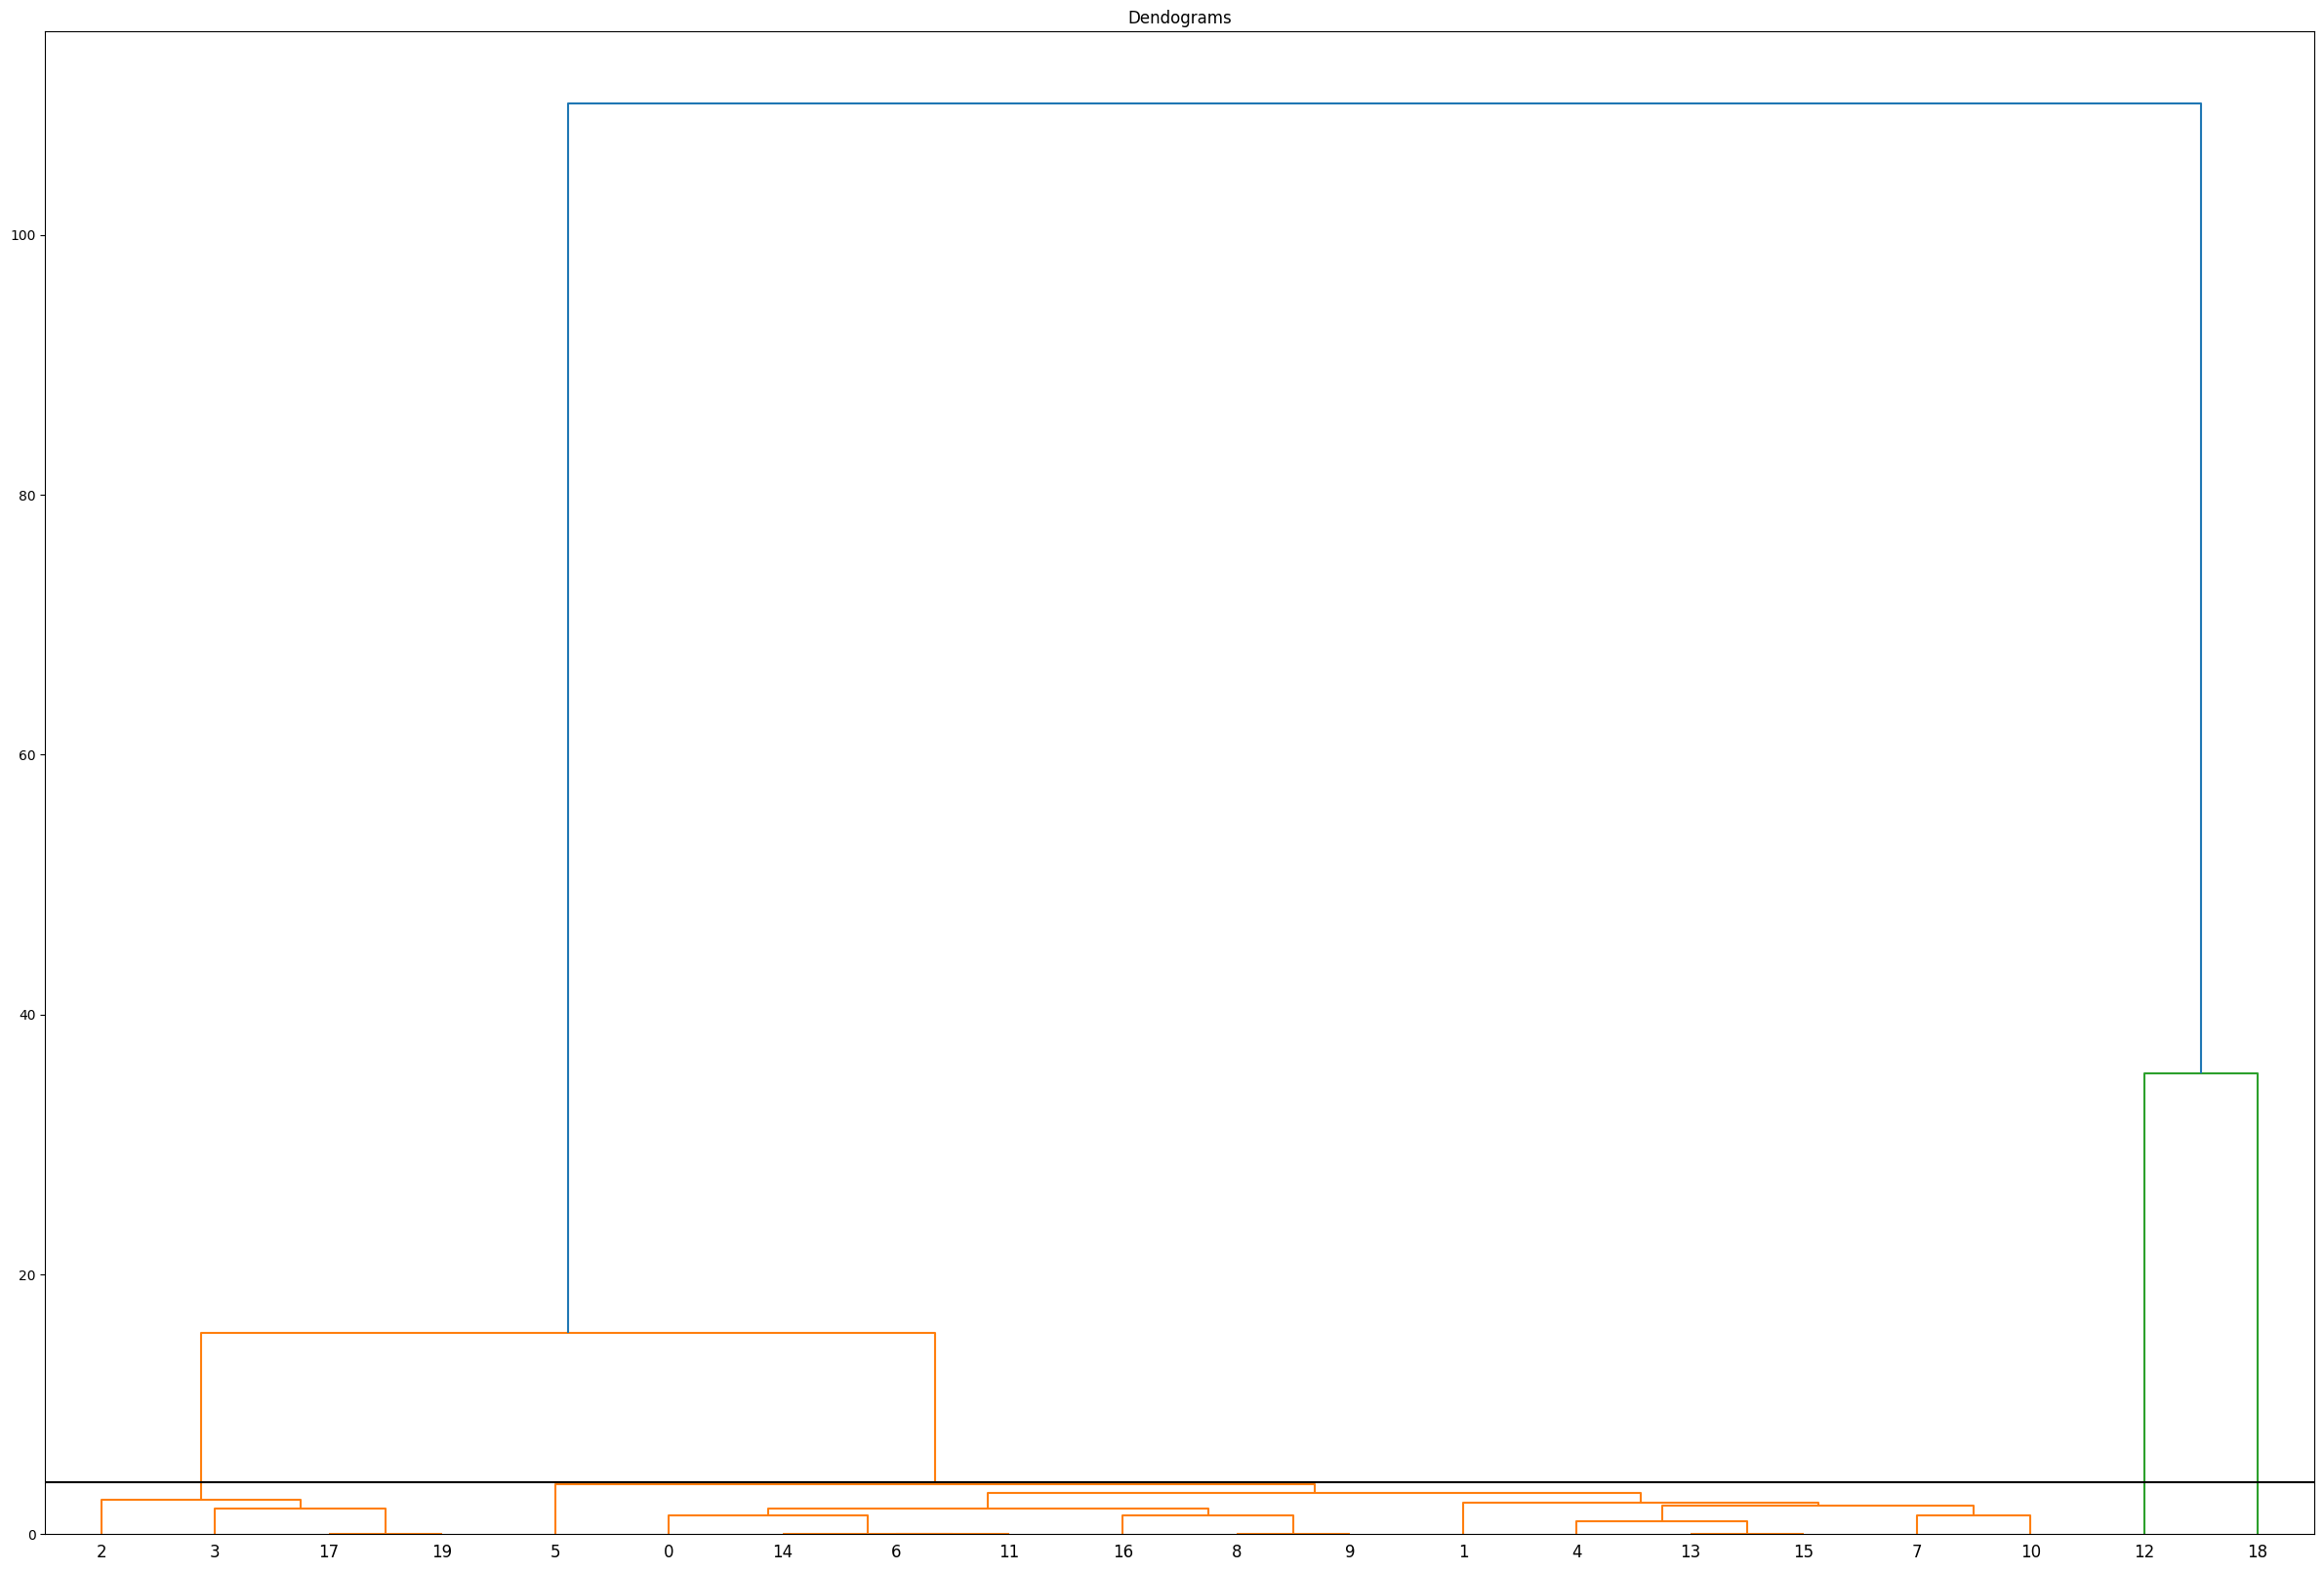

In [12]:
plt.figure(figsize=(30, 20))
plt.title("Dendograms")
dend = shc.dendrogram(shc.linkage(hasil, method='complete'))
plt.axhline(y=4, c='k')
plt.savefig('plt.png', format='png', bbox_inches='tight')
# plt.savefig('chart.png',figsize=(300, 300),dpi=300)

In [13]:
st = time.time()
clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
cluster_result = clustering.fit_predict(hasil)
clustering.fit_predict(hasil)

et = time.time()

In [14]:
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Execution time: 0.005136251449584961 seconds


In [15]:
print(f'Silhouette Score : {silhouette_score(hasil, cluster_result)}')

Silhouette Score : 0.8866292243299483


In [16]:
df['cluster'] = cluster_result

In [17]:
print("Rata-rata tiap cluster (AHC):")
print(df.groupby('cluster')[['omset', 'tenaga_kerja']].mean())

Rata-rata tiap cluster (AHC):
              omset  tenaga_kerja
cluster                          
0        102.500000      2.500000
1         13.333333      0.444444


In [18]:
df

,status_kepemilikan_tanah,tujuan_pemasaran,omset,tenaga_kerja,kepemilikan_asuransi_kesehatan,cluster
0,Lainnya,Dalam wilayah DIY,10,0,Tidak Ada,1
1,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,2,BPJS,1
2,Lainnya,Dalam wilayah Kota Yogyakarta,25,1,Tidak Ada,1
3,Sewa,Dalam wilayah Kota Yogyakarta,25,0,BPJS,1
4,Lainnya,Dalam wilayah Kota Yogyakarta,10,0,BPJS,1
5,Lainnya,Dalam wilayah DIY,10,3,Tidak Ada,1
6,Milik sendiri,Dalam wilayah DIY,10,0,Tidak Ada,1
7,Milik sendiri,Dalam wilayah DIY,10,0,BPJS,1
8,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,0,Tidak Ada,1
9,Milik sendiri,Dalam wilayah Kota Yogyakarta,10,0,Tidak Ada,1


In [19]:
records = df[df['cluster'] == 1]

In [20]:
i=0
for index, row in records.iterrows():
    i=i+1
    print(row['tujuan_pemasaran'],row['omset'])
print(i)

Dalam wilayah DIY 10
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah Kota Yogyakarta 25
Dalam wilayah Kota Yogyakarta 25
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah DIY 10
Dalam wilayah DIY 10
Dalam wilayah DIY 10
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah DIY 10
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah DIY 10
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah Kota Yogyakarta 10
Dalam wilayah DIY 25
Dalam wilayah DIY 25
18


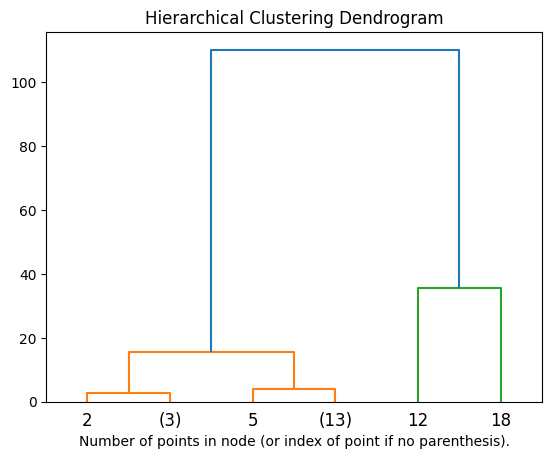

In [21]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# iris = load_iris()
X = hasil

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, metric='euclidean', linkage='complete')

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")

# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [22]:
df['cluster'].value_counts()
#jumlah cluster data

,count
cluster,
1,18
0,2


In [23]:
df['cluster_ahc'] = cluster_result
df[['omset', 'tenaga_kerja', 'cluster_ahc']]

,omset,tenaga_kerja,cluster_ahc
0,10,0,1
1,10,2,1
2,25,1,1
3,25,0,1
4,10,0,1
5,10,3,1
6,10,0,1
7,10,0,1
8,10,0,1
9,10,0,1
